In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


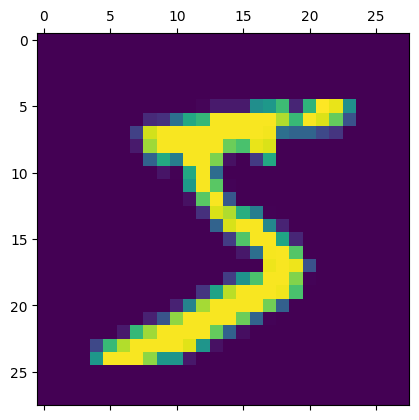

In [4]:
plt.matshow(x_train[0])

In [5]:
x_train=x_train/255
x_test=x_test/255

In [6]:
x_train_flattened=x_train.reshape(len(x_train),28*28)

In [7]:
x_train_flattened.shape

(60000, 784)

In [8]:
x_test_flattened=x_test.reshape(len(x_test),28*28)

Simple neural network

In [9]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4666 - accuracy: 0.8785
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3042 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2734 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9254


Evaluate on test dataset

In [10]:
model.fit(x_test_flattened,y_test,epochs=5)

Epoch 1/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2639 - accuracy: 0.9254
Epoch 2/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2457 - accuracy: 0.9320
Epoch 3/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2350 - accuracy: 0.9339
Epoch 4/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2268 - accuracy: 0.9373
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2195 - accuracy: 0.9390


Sample prediction

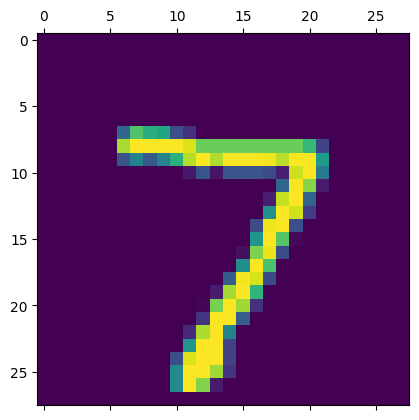

In [11]:
plt.matshow(x_test[0])

In [12]:
y_predicted=model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([3.1291008e-02, 6.0170225e-07, 1.1172130e-01, 9.8330200e-01,
       8.5644476e-04, 1.9353506e-01, 9.9465842e-07, 9.9955684e-01,
       1.6178107e-01, 5.3753036e-01], dtype=float32)

In [13]:
np.argmax(y_predicted[0])

7

Confusion Matrix

In [14]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]


In [15]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    3,    3,    1,    3,    1],
       [   0, 1119,    3,    2,    1,    1,    3,    2,    4,    0],
       [   4,    5,  952,   10,   14,    2,    8,    9,   23,    5],
       [   2,    0,   16,  948,    2,   13,    0,    7,   14,    8],
       [   2,    1,    4,    1,  939,    0,    1,    2,    5,   27],
       [   6,    4,    5,   34,   10,  783,   10,    1,   33,    6],
       [   6,    3,    7,    1,    8,   14,  914,    1,    4,    0],
       [   2,    6,   18,    5,    6,    1,    0,  954,    2,   34],
       [   3,    9,    6,   20,    8,   16,    3,    5,  894,   10],
       [   6,    7,    1,   11,   20,    4,    0,    9,    6,  945]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

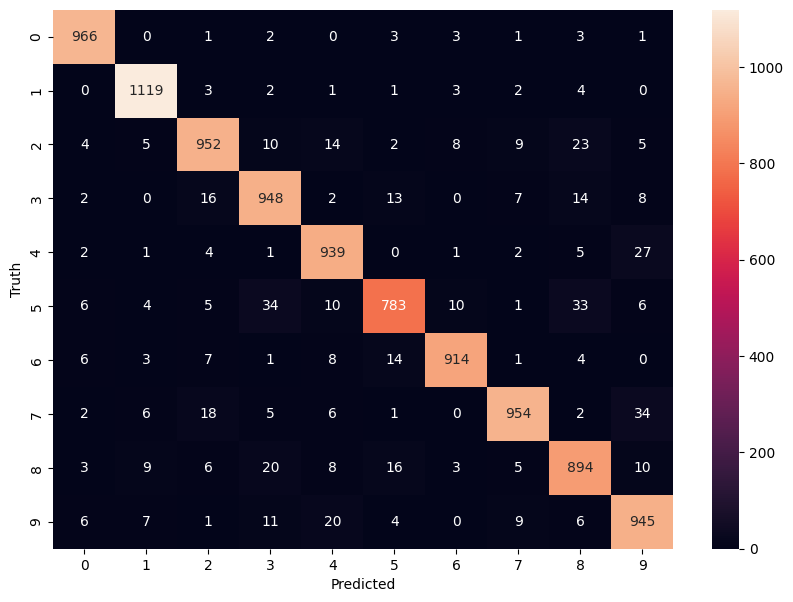

In [16]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

With hidden layer

In [17]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2730 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1218 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0849 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0646 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0529 - accuracy: 0.9832


In [18]:
model.fit(x_test_flattened,y_test,epochs=5)

Epoch 1/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0782 - accuracy: 0.9763
Epoch 2/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0362 - accuracy: 0.9904
Epoch 3/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0229 - accuracy: 0.9942
Epoch 4/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0135 - accuracy: 0.9981
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0100 - accuracy: 0.9989


With flattened layer

In [19]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2670 - accuracy: 0.9247
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1213 - accuracy: 0.9636
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0846 - accuracy: 0.9749
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0634 - accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0506 - accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0404 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0329 - accuracy: 0.9901
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0272 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0228 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.018